# Capítulo 3 - Objetos de Sequência

Sequências biológicas são, sem dúvidas, o objeto central da Bioinformática e neste capítulo vamos introduzir o mecanismo de trabalho com sequências do Biopython, o objeto **Seq**. No Capítulo 4 (***link do capítulo 4***) veremos o objeto **SeqRecord**, cujo combina as sequências com informações relacionadas as mesmas, e usado novamente no Capítulo 5 (***link do capítulo 5***) para o objeto **SeqIO**.

As sequências são nada menos do que uma string de letras, como por exemplo **AGTACACTGGT**, o que parece algo bem natural, pois é bem comum as sequências biológicas serem representadas dessa maneira nos arquivos.

A grande diferença entre um objeto **Seq** e uma string Python são os métodos aplicados entre as duas. Tudo o que pode ser feito em uma string Python pode ser feito em um objeto **Seq**, mas nem tudo que um objeto **Seq** suporta uma string Python suporta. Por exemplo, o método **translate()** traduz o objeto **Seq**, o método **reverse_complement()** mostra um objeto **Seq** que é reverso complementar ao objeto **Seq** original; entre outros métodos biológicos relevantes.

## 3.1 Sequências agem como strings

Em diversos casos, você pode tratar os objetos **Seq** como uma string Python, como saber o seu tamanho o iterar com outros elementos:

In [1]:
from Bio.Seq import Seq
minha_sequencia = Seq('GATCG')
for indice, letra in enumerate(minha_sequencia):
    print(indice, letra)

In [2]:
print(f'Tamanho: {len(minha_sequencia)}')

Você pode também acessar os elementos de um objeto **Seq** como se fosse uma string Python (mas lembre-se: o Python começa a contar a partir do 0!):

In [3]:
print(minha_sequencia[0])  # prmeira letra

G


In [4]:
print(minha_sequencia[2])  # terceira letra

T


In [5]:
print(minha_sequencia[-1])  # última letra

G


O objeto **Seq** possui o método **count()**, assim como uma string Python. Note que como uma string Python, isso retorna uma contagem *não sobreposta*:

In [6]:
'AAAA'.count('AA')

2

In [7]:
from Bio.Seq import Seq
Seq('AAAA').count('AA')

2

Para diveros usos biológicos, você provavelmente gostará que haja uma contagem sobreposta (i.e. 3 no exemplo acima). Quando estamos procurando por letras únicas, isso não faz diferença:

In [8]:
from Bio.Seq import Seq
minha_sequencia = Seq('GATCGATGGGCCTATATAGGATCGAAAATCGC')
len(minha_sequencia)

32

In [9]:
minha_sequencia.count('G')

9

In [10]:
100 * float(minha_sequencia.count('G') + minha_sequencia.count('C')) / len(minha_sequencia)

46.875

Embora você possa usar o código acima para calcular o valor de GC%, vale ressaltar que o `Bio.SeqUtils` possui um módulo chamado **GC** que faz esse cálculo:

In [11]:
from Bio.Seq import Seq
from Bio.SeqUtils import GC
minha_sequencia = Seq('GATCGATGGGCCTATATAGGATCGAAAATCGC')
GC(minha_sequencia)

46.875

Obseve que ao usar o `Bio.SeqUtils.GC()`, a função automaticamente lida com casos de sequências maiúsculas e minúsculas, e com casos de ambiguidade de nucletotídeos; como *S* representando tanto *G* como *C* (em caso de dúvidas, consulte: https://www.bioinformatics.org/sms/iupac.html).

Assim como uma string Python, o objeto **Seq** na maioria das vezes está somente no "modo de leitura". Se você precisar editar a sua sequência, por exemplo para simular uma mutação, veja a **Seção 3.12** desse documento para saber mais sobre o objeto **MutableSeq**.

## 3.2 Fatiando uma sequência

Um exemplo mais complicado, vamos ver um pedaço da sequência:

In [12]:
from Bio.Seq import Seq
minha_sequencia = Seq('GATCGATGGGCCTATATAGGATCGAAAATCGC')
minha_sequencia[4:12]

Seq('GATGGGCC')

Observe que esse objeto **Seq** segue as convensões de indexação das strings Python, onde o primeiro elemento é indicado com o índice 0. Quando você fatia, o primeiro elemento é incluído (i.e. 4 nesse caso) e o último elemento é excluído (i.e. 12 nesse caso).

Assim como em strings Python, você pode fatiar o começo, o fim e de quantas em quantas letras será fatiada (por padrão, esse último valor é definido como 1). Por exemplo, você pode pegar o primeiro, o segundo e o terceiro nucleotídeo do de cada códon na sequência de DNA:

In [13]:
minha_sequencia[0::3]  # primeiro nucleotídeo de cada códon

Seq('GCTGTAGTAAG')

In [14]:
minha_sequencia[1::3]  # segundo nucleotído de cada códon

Seq('AGGCATGCATC')

In [15]:
minha_sequencia[2::3]  # terceiro nucleotídeo de cada códon

Seq('TAGCTAAGAC')

Um outro truque que você pode fazer com uma string Python é usar o valor de quantas letras serão fatiadas com o valor -1, fazendo isso você obtêm o sentido contrário da string. Você pode fazer isso com um objeto **Seq** também:

In [16]:
minha_sequencia[::-1]

Seq('CGCTAAAAGCTAGGATATATCCGGGTAGCTAG')

## 3.3 Transformando objetos Seq em strings

Se você precisar transformar um objeto **Seq** em uma string para adicioná-lo a um arquivo ou ao banco de dados, é bem simples de fazer isso:

In [17]:
str(minha_sequencia)

'GATCGATGGGCCTATATAGGATCGAAAATCGC'

Chamando o método **str()** em um objeto **Seq**, é retornado a sequência como uma string, você geralmente não precisa realizar essa conversão de maneira explicita. O Python faz isso atomaticamente com a função **print()**:

In [18]:
print(minha_sequencia)

GATCGATGGGCCTATATAGGATCGAAAATCGC


Você pode usar um objeto **Seq** direto com uma *f-string*:

In [19]:
formato_fasta_string = f'''>Nome
{minha_sequencia}'''
print(formato_fasta_string)

>Nome
GATCGATGGGCCTATATAGGATCGAAAATCGC


A linha acima é uma maneira simples de construir um arquivo no fomato FASTA. A **Seção 4.6** no Capítulo 4 (***link do capítulo 4***) descreve uma maneira bacana de criar um arquivo FASTA com uma string vinda do objeto **SeqRecord**, enquanto o tópico mais geral de leitura e escrita de um aquivo FASTA será mais explicado no Capítulo 5 (***link do capítulo 5***).

## 3.4 Concatenando ou adicionando sequências

A partir da versão 1.78 do Biopython, você pode adicionar quaisquer dois objetos **Seq** juntos:

In [20]:
from Bio.Seq import Seq
proteina_seq = Seq('EVRNAK')
dna_seq = Seq('ACGT')
proteina_seq + dna_seq

Seq('EVRNAKACGT')

Misturar deliberadamente DNA com proteína com certeza é um erro. Você pode adicionar sequências uma após a outra, usar um loop para isso é uma ótima escolha:

In [21]:
from Bio.Seq import Seq
lista_sequencias = [Seq('ACGT'), Seq('AACC'), Seq('GGTT')]
concatenado = ''
for sequencia in lista_sequencias:
    concatenado += sequencia
concatenado

Seq('ACGTAACCGGTT')

Assim como as strings Python, os objetos **Seq** também podem ser usados com o método **join()**:

In [22]:
from Bio.Seq import Seq
contigs = [Seq('ATG'), Seq('ATCCCG'), Seq('TTGCA')]
spacer = Seq('N'*10)
spacer.join(contigs)

Seq('ATGNNNNNNNNNNATCCCGNNNNNNNNNNTTGCA')

## 3.5 Mudança de fonte

Do mesmo modo com as strings Python, os objetos **Seq** também possuem os métodos **lower** e **upper**. Por exemplo:

In [23]:
from Bio.Seq import Seq
dna_seq = Seq('acgtACGT')
dna_seq

Seq('acgtACGT')

In [24]:
dna_seq.upper()

Seq('ACGTACGT')

In [25]:
dna_seq.lower()

Seq('acgtacgt')

Usar esses métodos é uma boa escolha para fazer uma correspondência sem distinção entre maiúsculas e minúsculas:

In [26]:
'GTAC' in dna_seq

False

In [27]:
'GTAC' in dna_seq.upper()

True

## 3.6 Sequências de nucleotídeos e (reverso) complementos

Para as sequências de nucleotídeos, é muitro fácil de se obter a sequência complementar ou reversa complementar de um objeto **Seq** com os métodos *built-in*:

In [28]:
from Bio.Seq import Seq
minha_sequencia = Seq('GATCGATGGGCCTATATAGGATCGAAAATCGC')
minha_sequencia

Seq('GATCGATGGGCCTATATAGGATCGAAAATCGC')

In [29]:
minha_sequencia.complement()

Seq('CTAGCTACCCGGATATATCCTAGCTTTTAGCG')

In [30]:
minha_sequencia.reverse_complement()

Seq('GCGATTTTCGATCCTATATAGGCCCATCGATC')

Como mencionado anteriormente, uma maneira fácil de obter a sequência reversa de um objeto **Seq** (ou uma string Python) é usar -1 como o valor de passos dados no fatiamento:

In [31]:
minha_sequencia[::-1]

Seq('CGCTAAAAGCTAGGATATATCCGGGTAGCTAG')

Se você acidentalmente tentar algo fora do comum, como tentar achar a sequência (reversa)complementar de uma proteína, os resultados biológicos não possuem sentido:

In [32]:
from Bio.Seq import Seq
proteina_seq = Seq('EVRNAK')
proteina_seq.complement()

Seq('EBYNTM')

Nesse caso, a letra "E" não é valida para o código de ambiguidade de nucleotídeos da IUPAC (veja mais em: https://www.bioinformatics.org/sms/iupac.html), logo não há a complementação. Todavia, "V" significa "A", "C" ou "G" e é complementar a "B" e assim por diante.

O exemplo na **Seção 5.5.3** do Capítulo 5 (***link do capítulo 5***) combina o método de reverso complementar do objeto **Seq** com o `Bio.SeqIO` para a entrada/saída de sequências.

## 3.7 Transcrição

Antes de falarmos da transcrição, vamos considerar o seguinte esquema da dupla fita de DNA que codifica um pequeno peptídeo:

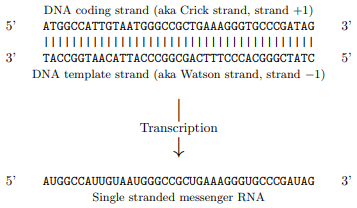

O atual processo de trasncrição biológica trabalha com a fita molde (*template strand*), fazendo o reverso complementar (TCAG → CUGA) para criar o mRNA. Contudo, no Biopython e na bioinormática de modo geral, normalmente é traballhado diretamente com a fita de codificação (*coding strand*), uma vez que basta trocar o nucleotídeo timina (T) pela uracila (U).

Agora vamos começar a fazer a transcrição com Biopython. Primero, vamos criar os objetos **Seq** para a fita codificante e a fita molde:

In [33]:
from Bio.Seq import Seq
codificante_dna = Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')
codificante_dna

Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')

In [34]:
molde_dna = codificante_dna.reverse_complement()
molde_dna

Seq('CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT')

Isso deve bater com a figura acima (lembre-se que a convenção da leitura dos nucleotídeos é 5' → 3').

Agora, vamos transcrever a fita codificante no mRNA correspondente com o método *built-in* **transcribe** no objeto **Seq**:

In [35]:
codificante_dna

Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')

In [36]:
rna_mensageiro = codificante_dna.transcribe()
rna_mensageiro

Seq('AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG')

Como você pode ver, todas as timinas (T) foram trocadas por uracilas (U).

Se você quiser fazer a transcrição da maneira biológica usando a fita molde, é necessário adicionar mais um método:

In [37]:
molde_dna

Seq('CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT')

In [38]:
molde_dna.reverse_complement().transcribe()

Seq('AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG')

O objeto **Seq** também inclui a transcrição reversa, que parte do mRNA para a fita codificante de DNA. Novamente, usando a substituição, mas nesse caso de uracila (U) para timina (T):

In [39]:
from Bio.Seq import Seq
rna_mensageiro = Seq('AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG')
rna_mensageiro

Seq('AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG')

In [40]:
rna_mensageiro.back_transcribe()

Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')

Nota: os métodos **transcribe** e **back_transcribe** para os objetos **Seq** foram adiionados na versão 1.49 do Biopython. Para versões anteriores a mencionada, veja a **Seção 3.14** para usar as funções do `Bio.Seq`.

## 3.8 Tradução

Continuando com o mesmo exemplo mostrado na transcrição, vamos agora traduzir a molécula de mRNA na sequência de proteína correspondente, aproveitando novamente dos métodos biológicos dos objetos **Seq**:

In [41]:
from Bio.Seq import Seq
rna_mensageiro =Seq('AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG')
rna_mensageiro

Seq('AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG')

In [42]:
rna_mensageiro.translate()

Seq('MAIVMGR*KGAR*')

Você pode traduzir diretamente da fita codificante do DNA:

In [43]:
from Bio.Seq import Seq
dna_codificante = Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')
dna_codificante

Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')

In [44]:
dna_codificante.translate()

Seq('MAIVMGR*KGAR*')

Você pode notar na sequência de proteína acima que além do caractere de parada ( * ) no final da sequência, há também um no meio da proteína. Essa sequência de nucleotídeos foi escolhida deliberadamente, pois isso abre espaço para falarmos da diferentes tabelas de tradução.

As tabelas de tradução disponíveis no Biopython são baseadas nas tabelas de tradução do NCBI (https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi), veremos mais sobre essas tabelas na próxima seção. Como regra, o método **translate** usa o código genético padrão (tabela 1 do NCBI). Suponha que estamos trabalhando com uma sequência mitocondrial. Nós devemos informar ao método para usar a tabela correta:

In [45]:
dna_codificante.translate(table='Vertebrate Mitochondrial')

Seq('MAIVMGRWKGAR*')

Além de usar o nome do organismo, você pode usar o número de identificação da tabela do NCBI; e muitas vezes essa informação é incluída nos arquivos GenBank:

In [46]:
dna_codificante.translate(table=2)

Seq('MAIVMGRWKGAR*')

Você pode traduzir os nucleotídeos do primeiro códon até o de parada e parar a tradução, da mesma forma que ocorre na natureza:

In [47]:
dna_codificante.translate()

Seq('MAIVMGR*KGAR*')

In [48]:
dna_codificante.translate(to_stop=True)

Seq('MAIVMGR')

In [49]:
dna_codificante.translate(table=2)

Seq('MAIVMGRWKGAR*')

In [50]:
dna_codificante.translate(table=2, to_stop=True)

Seq('MAIVMGRWKGAR')

Você pode notar que quando passamos *True* para o parâmetro **to_stop**, o códon de parada não é traduzido e por consequência não é mostrado a sua grafia no final da sequência de peptídeos.

Você pode mudar o símbolo que representa o códon de parada, caso não goste do asterísco:

In [51]:
dna_codificante.translate(table=2, stop_symbol='@')

Seq('MAIVMGRWKGAR@')

Agora, suponha que você tenha a sequência completa de codificação CDS, onde há uma sequência de nucleotídeos com um grande número de códons, começando com o *start* códon e terminando com um *stop* códon, sem códons de parada no meio dessa sequência. De modo geral, obtendo uma CDS completa, o método padrão de tradção fará o que você quer. Porém, e se a sua sequência usar um *start* códon fora do padrão? Isso acontece muito em bactérias, por exemplo no gene yaaX da *Escherichia coli* K12:

In [52]:
from Bio.Seq import Seq
gene = Seq('GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGGTCGCTCCCATGGCA'
          'GCACAGGCTGCGGAAATTACGTTAGTCCCGTCAGTAAAATTACAGATAGGCGATCGTGAT'
          'AATCGTGGCTATTACTGGGATGGAGGTCACTGGCGCGACCACGGCTGGTGGAAACAACAT'
          'TATGAATGGCGAGGCAATCGCTGGCACCTACACGGACCGCCGCCACCGCCGCGCCACCAT'
          'AAGAAAGCTCCTCATGATCATCACGGCGGTCATGGTCCAGGCAAACATCACCGCTAA')

In [53]:
gene.translate(table='Bacterial')

Seq('VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDH...HR*')

In [54]:
gene.translate(table='Bacterial', to_stop=True)

Seq('VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDH...HHR')

O código genético bacteriano, o códon **GTG** é um *start* códon válido, embora esse códon "normalmente" codifique uma valina (V), se usado como um *star* códon deverá ser traduzido como metionina (M). Para isso, basta informar ao Biopython que o que ele está analisando é uma CDS completa:

In [55]:
gene.translate(table='Bacterial', cds=True)

Seq('MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDH...HHR')

Além de informar ao Biopython para traduzir um *start* códon alternativo como metionina, usar esse parâmetro serve também para ter certeza de que a sequência é uma CDS válida. Se não for, será retornado um erro de exceção.

O exemplo na **Seção 20.1.3** do Capítulo 20 (***link do capítulo 20***) combina a tradução dos objetos **Seq** com o `Bio.SeqIO` para sequências de entrada/saída.

## 3.9 Tabelas de tradução

Na seção anterior, falamos sobre o método de tradução dos objetos **Seq** (mencionamos a função equivalente do módulo `Bio.Seq`, veja a **Seção 3.14**). Internamente, as tabelas usadas vem das informações do NCBI (para baixar o arquivo: https://ftp.ncbi.nlm.nih.gov/entrez/misc/data/gc.prt, para acessar online as tabelas: https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi).

Mas antes, vamos focar em duas opções: a tabela de tradução padrão e a tabela de tradução da mitocôndria de vertebrados:

In [56]:
from Bio.Data import CodonTable
tabela_padrao = CodonTable.unambiguous_dna_by_name['Standard']
tabela_mito = CodonTable.unambiguous_dna_by_name['Vertebrate Mitochondrial']

De maneira alternativa, você pode passar o número de idetificação:

In [57]:
from Bio.Data import CodonTable
tabela_padrao = CodonTable.unambiguous_dna_by_id[1]
tabela_mito = CodonTable.unambiguous_dna_by_id[2]

In [58]:
print(tabela_padrao)

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [59]:
print(tabela_mito)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

Você pode encontrar algumas propriedades úteis, por exemplo se estiver tentando fazer as suas próprias descobertas gênicas:

In [60]:
tabela_mito.stop_codons

['TAA', 'TAG', 'AGA', 'AGG']

In [61]:
tabela_mito.start_codons

['ATT', 'ATC', 'ATA', 'ATG', 'GTG']

In [62]:
tabela_mito.forward_table['ACG']

'T'

## 3.10 Comparando objetos Seq

A comparação de sequências é um tópico bem complicado e não há uma maneira simples de dizer se uma sequência é igual a outra. O problema básico é o significado das letras nas sequências são dependentes do contexto, o "A" faz parte do DNA, RNA ou da proteína? O Biopython consegue rastrear o tipo molecular.

Deveria o fragmento de DNA "ACG" e de RNA "ACG" serem iguais? E o peptídeo "ACG"? Ou ainda a string Python "ACG"? No dia a dia, sua sequência geralmente será do mesmo tipo (DNA, RNA ou proteína). Desde a versão 1.65 do Biopyton, a comparação de sequências apenas olha para as sequências e compara como uma string Python:

In [63]:
from Bio.Seq import Seq
seq1 = Seq('ACGT')

In [64]:
'ACGT' == seq1

True

In [65]:
seq1 == 'ACGT'

True

Como uma extensão disso, voceê pode usar os nomes das sequências como as chaves de um dicionário Python e a sequência como string sendo os valores. Para saber como trasnformar um objeto **Seq** em uma string Python, veja a **Seção 3.3**.

## 3.11 Sequências com conteúdo de sequência desconhecido

Na maioria dos casos, o tamanho da sequência pode ser conhecido, mas não as reais letras que a constitui. Por exemplo, arquivos do GenBank e EMBL podem apresentar uma sequência de DNA genômico que contenha somente contigs, sem especificar a sequência de modo explicito. Muitas sequências podem ser representadas pelo objeto **Seq** com o argumento **None**, seguido do seu tamanho:

In [66]:
from Bio.Seq import Seq
desconhecida_seq = Seq(None, 10)

O objeto **Seq** acima criado tem o seu tamanho bem definido. Qualquer tentativa de acessar o conteúdo da sequência retornará no erro **UndefinedSequenceError**:

In [67]:
desconhecida_seq

Seq(None, length=10)

In [68]:
print(desconhecida_seq)

UndefinedSequenceError: Sequence content is undefined

## 3.12 Objetos MutableSeq

Assim como nas strings Python, os objetos **Seq** estão disponíveis somente no "modo de leitura", ou de um jeito Pythônico, são imutáveis. Além de querer que os objetos **Seq** comportem-se como uma string, isso é muito útil quando estamos lidando com dados biológicos, onde devemos garantir que não estamos alterando nada em nossa sequência:

In [69]:
from Bio.Seq import Seq
minha_sequencia = Seq('GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA')

Observe o que acontece quando você tenta editar a sequência:

In [70]:
minha_sequencia[5] = 'G'

TypeError: 'Seq' object does not support item assignment

Todavia, você pode converter o objeto **Seq** em um objeto **MutableSeq**, podendo editar agora a sequência:

In [71]:
from Bio.Seq import MutableSeq
mutacao_seq = MutableSeq('GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA')

Qualquer uma das formas a seguir retornará um objeto de sequência com alterações (mutações):

In [72]:
mutacao_seq

MutableSeq('GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA')

In [73]:
mutacao_seq[5] = 'c'
mutacao_seq

MutableSeq('GCCATcGTAATGGGCCGCTGAAAGGGTGCCCGA')

In [74]:
mutacao_seq.remove('T')
mutacao_seq

MutableSeq('GCCAcGTAATGGGCCGCTGAAAGGGTGCCCGA')

In [75]:
mutacao_seq.reverse()
mutacao_seq

MutableSeq('AGCCCGTGGGAAAGTCGCCGGGTAATGcACCG')

Vale ressaltar que, como o objeto **Seq**, o objeto **MutableSeq** também possui os métodos de **reverse_complement** e **reverse** atuando *in situ*!

Uma importante diferença técnica entre objetos mutáveis e não mutáveis em Python é que você não pode usar os objetos mutáveis como as chaves do dicionário, mas você pode usar strings Python e objetos **Seq** (que são imtáveis) para essa finalidade.

Uma vez terminada a edição no objeto **MutableSeq**, é fácil fazer a volta para um objeto **Seq**:

In [76]:
from Bio.Seq import Seq
nova_seq = Seq(mutacao_seq)
nova_seq

Seq('AGCCCGTGGGAAAGTCGCCGGGTAATGcACCG')

Assim como você pode transformar o objeto **Seq** em string Python, o mesmo vale para o objeto **MutableSeq** (veja a **Seção 3.3**).

## 3.13 Objetos UnknownSeq

***Nota: o objeto `UnknownSeq` está em desuso. Para representar o tamanho da sequência sem saber a ordem das letras, use `Seq(None, tamanho)`.***

O objeto **UnknownSeq** é uma subclasse do objeto **Seq** e seu propósito é representar uma sequência onde você sabe o tamanho, mas não a ordem das letras que a compõe. Você pode usar o objeto **Seq** para essa situação, mas isso desperdiça muita memória para segurar uma string com milhões de *n* caracteres quando você pode armazenar uma única letra "N" e o tamanho da sequência:

In [77]:
from Bio.Seq import UnknownSeq
desconhecida_seq = UnknownSeq(20)
desconhecida_seq

D:\Jupyter\lib\site-packages\Bio\Seq.py:2008: BiopythonDeprecationWarning: UnknownSeq(length) is deprecated; please use Seq(None, length) instead.
  warnings.warn(


UnknownSeq(20, character='?')

In [78]:
print(desconhecida_seq)

????????????????????


In [79]:
len(desconhecida_seq)

20

Para sequências de DNA e RNA, nucleotídeos desconhecidos são comumente denominados pela letra "N", enquanto que para as proteínas é usada a letra "X" para os aminoácidos desconhecidos. Quando um objeto **UnknownSeq** é criado, você pode especificar o caractere que será usado ao invés do padrão "?":

In [80]:
from Bio.Seq import UnknownSeq
desconhecido_dna = UnknownSeq(20, character='N')
desconhecido_dna

UnknownSeq(20, character='N')

In [81]:
print(desconhecido_dna)

NNNNNNNNNNNNNNNNNNNN


Você pode usar todos os métodos do objeto **Seq** aqui, note que o objeto **UnknownSeq** salva memória quando apropriado:

In [82]:
desconhecido_dna

UnknownSeq(20, character='N')

In [83]:
desconhecido_dna.complement()

UnknownSeq(20, character='N')

In [84]:
desconhecido_dna.reverse_complement()

UnknownSeq(20, character='N')

In [85]:
desconhecido_dna.transcribe()

UnknownSeq(20, character='N')

In [86]:
desconhecida_prot = desconhecido_dna.translate()
desconhecida_prot

UnknownSeq(6, character='X')

In [87]:
print(desconhecida_prot)

XXXXXX


In [88]:
len(desconhecida_prot)

6

Você pode encontrar um uso para o objeto **UnknownSeq** para o seu código, mas é mais provável que você o encontre em um objeto **SeqRecord** criado pelo `Bio.SeqIO`. Muitos arquivos de sequência nem incluem a sequência real, por exemplo o GenBank e o EMBL podem incluir uma lista de recursos, mas para a sequência em si são somente as contigs. Por outro lado, arquivos no formato QUAL usam uma sequência de qualidade de leitura, **NUNCA** a sequência em si, para ter a sequência é só usar os arquivos FASTA.

## 3.14 Trabalhanco diretamente com strings

Para finalizar esse capítulo, para aqueles objetos de sequência que você *realmente* quer usar strings Python (ou para aqueles que preferem a programação funcional ao invés da orientada a objetos), existem funções de `Bio.Seq` que aceitam strings nativas do Python, objetos **Seq** (ou objetos **UnknownSeq**) ou objetos **MutableSeq**:

In [89]:
from Bio.Seq import reverse_complement, transcribe, back_transcribe, translate
minha_string = 'GCTGTTATGGGTCGTTGGAAGGGTGGTCGTGCTGCTGGTTAG'

In [90]:
reverse_complement(minha_string)

'CTAACCAGCAGCACGACCACCCTTCCAACGACCCATAACAGC'

In [91]:
transcribe(minha_string)

'GCUGUUAUGGGUCGUUGGAAGGGUGGUCGUGCUGCUGGUUAG'

In [92]:
back_transcribe(minha_string)

'GCTGTTATGGGTCGTTGGAAGGGTGGTCGTGCTGCTGGTTAG'

In [93]:
translate(minha_string)

'AVMGRWKGGRAAG*'

Você está, contudo, enconrajado a usar os objetos **Seq** por padrão.

Só isso, mais nada!